In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset,DataLoader

#### INSTRUCTIONS FOR I/O (PLEASE READ) #######
# Input data files are available in the read-only "../input/" (relative) or '/kaggle/input'(absolute) directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
input_path = '/kaggle/input/2024-flame-ai-challenge/dataset/'
output_path = '/kaggle/working/'

# Load Metadata

In [2]:
train_df = pd.read_csv(os.path.join(input_path,'train.csv'))
train_df

,id,u,alpha,Nt,Nx,Ny,theta_filename,ustar_filename,xi_filename
0,804025,2,10,150,113,32,theta_K_id804025.dat,ustar_ms-1_id804025.dat,xi_id804025.dat
1,875935,2,5,150,113,32,theta_K_id875935.dat,ustar_ms-1_id875935.dat,xi_id875935.dat
2,930086,6,0,150,113,32,theta_K_id930086.dat,ustar_ms-1_id930086.dat,xi_id930086.dat
3,661713,4,5,150,113,32,theta_K_id661713.dat,ustar_ms-1_id661713.dat,xi_id661713.dat
4,633229,2,0,150,113,32,theta_K_id633229.dat,ustar_ms-1_id633229.dat,xi_id633229.dat
5,868570,4,0,150,113,32,theta_K_id868570.dat,ustar_ms-1_id868570.dat,xi_id868570.dat
6,16525,6,5,150,113,32,theta_K_id016525.dat,ustar_ms-1_id016525.dat,xi_id016525.dat
7,808631,6,10,150,113,32,theta_K_id808631.dat,ustar_ms-1_id808631.dat,xi_id808631.dat
8,220212,4,10,150,113,32,theta_K_id220212.dat,ustar_ms-1_id220212.dat,xi_id220212.dat


In [3]:
test_df = pd.read_csv(os.path.join(input_path,'test.csv'))
test_df

,id,u,alpha,Nt,Nx,Ny,theta_filename,ustar_filename,xi_filename
0,219547,5,2.5,5,113,32,theta_K_id219547.dat,ustar_ms-1_id219547.dat,xi_id219547.dat
1,167403,5,2.5,5,113,32,theta_K_id167403.dat,ustar_ms-1_id167403.dat,xi_id167403.dat
2,225258,5,2.5,5,113,32,theta_K_id225258.dat,ustar_ms-1_id225258.dat,xi_id225258.dat
3,890407,5,25.0,5,113,32,theta_K_id890407.dat,ustar_ms-1_id890407.dat,xi_id890407.dat
4,352206,5,25.0,5,113,32,theta_K_id352206.dat,ustar_ms-1_id352206.dat,xi_id352206.dat
5,989981,5,25.0,5,113,32,theta_K_id989981.dat,ustar_ms-1_id989981.dat,xi_id989981.dat
6,714528,5,7.5,5,113,32,theta_K_id714528.dat,ustar_ms-1_id714528.dat,xi_id714528.dat
7,769043,5,7.5,5,113,32,theta_K_id769043.dat,ustar_ms-1_id769043.dat,xi_id769043.dat
8,965687,5,7.5,5,113,32,theta_K_id965687.dat,ustar_ms-1_id965687.dat,xi_id965687.dat
9,329500,9,2.5,5,113,32,theta_K_id329500.dat,ustar_ms-1_id329500.dat,xi_id329500.dat


In [4]:
# load data
def load_dataX(idx):
    csv_file = train_df.reset_index().to_dict(orient='list')
    dir_path = os.path.join(input_path, "train")
    id = csv_file['id'][idx]
    nt, Nx, Ny = csv_file['Nt'][idx], csv_file['Nx'][idx], csv_file['Ny'][idx]
    theta = np.fromfile(os.path.join(dir_path, csv_file['theta_filename'][idx]), dtype="<f4").reshape(nt, Nx, Ny)
    ustar = np.fromfile(os.path.join(dir_path, csv_file['ustar_filename'][idx]), dtype="<f4").reshape(nt, Nx, Ny)
    xi_f = np.fromfile(os.path.join(dir_path, csv_file['xi_filename'][idx]), dtype="<f4").reshape(nt, Nx, Ny)
    uin  = csv_file['u'][idx]
    alpha = csv_file['alpha'][idx]

    return theta, ustar, xi_f, uin, alpha

idx = 5
theta, ustar, xi_f, uin, alpha = load_dataX(idx)

In [5]:
class FireLineDataset(Dataset):
    def __init__(self, data_frame, data_dir, sequence_length=5):
        """
        Args:
            data_frame (pandas.DataFrame): Dataframe containing file metadata.
            data_dir (string): Directory where data files are stored.
            sequence_length (int): Number of time steps in each input/output sequence (default is 5).
        """
        self.data_frame = data_frame
        self.data_dir = data_dir
        self.sequence_length = sequence_length
        self.num_time_steps = 150 - 2* sequence_length  # Total available time steps for sliding window

    def load_data_file(self, filename):
        """Loads a .dat file from the data directory."""
        file_path = f"{self.data_dir}/{filename}"
        return np.fromfile(file_path, dtype=np.float32).reshape(150, 113, 32)

    def __getitem__(self, idx):
        # Determine the sample (data row) and time step based on the index
        sample_idx = idx // self.num_time_steps  # Which data sample (row in the dataframe)
        time_step_idx = idx % self.num_time_steps  # Starting time step for this sequence

        row = self.data_frame.iloc[sample_idx]
        theta_file = row['theta_filename']
        ustar_file = row['ustar_filename']
        xi_file = row['xi_filename']

        # Load the data
        theta = self.load_data_file(theta_file)  # Shape: [150, 113, 32]
        ustar = self.load_data_file(ustar_file)  # Shape: [150, 113, 32]
        xi = self.load_data_file(xi_file)        # Shape: [150, 113, 32]

        # Prepare inputs (time steps t to t+sequence_length)
        input_theta = theta[time_step_idx:time_step_idx + self.sequence_length]  # Shape: [5, 113, 32]
        input_ustar = ustar[time_step_idx:time_step_idx + self.sequence_length]  # Shape: [5, 113, 32]
        input_xi = xi[time_step_idx:time_step_idx + self.sequence_length]        # Shape: [5, 113, 32]

        # Stack the input data channels
        input_data = np.stack([input_theta, input_ustar, input_xi], axis=0)  # Shape: [5, 3, 113, 32]

        # Prepare targets (next sequence_length time steps, i.e., t+1 to t+sequence_length+1)
        #target_theta = theta[time_step_idx + self.sequence_length:time_step_idx + 2 * self.sequence_length]  # [5, 113, 32]
        #target_ustar = ustar[time_step_idx + self.sequence_length:time_step_idx + 2 * self.sequence_length]  # [5, 113, 32]
        target_xi = xi[time_step_idx + self.sequence_length:time_step_idx + 2 * self.sequence_length]        # [5, 113, 32]
        
        # Stack target data channels
        target_data = np.stack([target_xi], axis=0)  # Shape: [5, 3, 113, 32]

        # Convert to torch tensors
        input_tensor = torch.from_numpy(input_data).float()
        target_tensor = torch.from_numpy(target_data).float()

        return input_tensor, target_tensor

    def __len__(self):
        # Total number of sliding window sequences across all samples
        return len(self.data_frame) * self.num_time_steps


In [6]:
# Load the dataframe with your data
dataset = FireLineDataset(train_df, data_dir=os.path.join(input_path, "train"))
dataset.__len__()

1260

In [7]:
# Create DataLoader for training

dataloader = DataLoader(dataset, batch_size=10, shuffle=False)
for inputs, targets in dataloader:
    print(inputs.shape, targets.shape)

torch.Size([10, 3, 5, 113, 32]) torch.Size([10, 1, 5, 113, 32])
torch.Size([10, 3, 5, 113, 32]) torch.Size([10, 1, 5, 113, 32])
torch.Size([10, 3, 5, 113, 32]) torch.Size([10, 1, 5, 113, 32])
torch.Size([10, 3, 5, 113, 32]) torch.Size([10, 1, 5, 113, 32])
torch.Size([10, 3, 5, 113, 32]) torch.Size([10, 1, 5, 113, 32])
torch.Size([10, 3, 5, 113, 32]) torch.Size([10, 1, 5, 113, 32])
torch.Size([10, 3, 5, 113, 32]) torch.Size([10, 1, 5, 113, 32])
torch.Size([10, 3, 5, 113, 32]) torch.Size([10, 1, 5, 113, 32])
torch.Size([10, 3, 5, 113, 32]) torch.Size([10, 1, 5, 113, 32])
torch.Size([10, 3, 5, 113, 32]) torch.Size([10, 1, 5, 113, 32])
torch.Size([10, 3, 5, 113, 32]) torch.Size([10, 1, 5, 113, 32])
torch.Size([10, 3, 5, 113, 32]) torch.Size([10, 1, 5, 113, 32])
torch.Size([10, 3, 5, 113, 32]) torch.Size([10, 1, 5, 113, 32])
torch.Size([10, 3, 5, 113, 32]) torch.Size([10, 1, 5, 113, 32])
torch.Size([10, 3, 5, 113, 32]) torch.Size([10, 1, 5, 113, 32])
torch.Size([10, 3, 5, 113, 32]) torch.Si

In [8]:


class ConvBlock3D(nn.Module):
    """3D Convolutional Block with two 3D convolutions and residual connection"""
    def __init__(self, in_channels, out_channels):
        super(ConvBlock3D, self).__init__()
        self.conv1 = nn.Conv3d(in_channels, out_channels, kernel_size=3, padding=1)
        self.conv2 = nn.Conv3d(out_channels, out_channels, kernel_size=3, padding=1)
        self.relu = nn.ReLU(inplace=True)
        self.batchnorm = nn.BatchNorm3d(out_channels)
        
        # Residual connection
        self.residual = nn.Conv3d(in_channels, out_channels, kernel_size=1)
    
    def forward(self, x):
        residual = self.residual(x)  # Residual connection to match the output shape
        x = self.relu(self.batchnorm(self.conv1(x)))
        x = self.relu(self.batchnorm(self.conv2(x)))
        return x + residual

class UResNet3D(nn.Module):
    def __init__(self):
        super(UResNet3D, self).__init__()

        # Encoder (down-sampling)
        self.enc1 = ConvBlock3D(3, 32)
        self.enc2 = ConvBlock3D(32, 64)
        self.enc3 = ConvBlock3D(64, 128)

        # Decoder (up-sampling)
        self.dec3 = ConvBlock3D(128, 64)
        self.dec2 = ConvBlock3D(64, 32)
        self.dec1 = ConvBlock3D(32, 3)  # Output to 3 channels (theta, ustar, xi)

        # Max pooling for down-sampling
        self.pool = nn.MaxPool3d(2)

        # Transposed convolution for up-sampling
        self.upconv3 = nn.ConvTranspose3d(128, 64, kernel_size=2, stride=2, output_padding=(0,0,0))  # Adjusted output_padding
        self.upconv2 = nn.ConvTranspose3d(64, 32, kernel_size=2, stride=2, output_padding=(1,1,0))  # Adjusted for proper spatial dimensions

    def forward(self, x):
        # Encoder
        e1 = self.enc1(x)  # Shape: [batch_size, 32, 5, 113, 32]
        e2 = self.enc2(self.pool(e1))  # Shape: [batch_size, 64, 2, 56, 16]
        e3 = self.enc3(self.pool(e2))  # Shape: [batch_size, 128, 1, 28, 8]

        # Decoder
        d3 = self.upconv3(e3)  # Shape: [batch_size, 64, 2, 56, 16]
        d3 = torch.cat([d3, e2], dim=1)  # Concatenate the corresponding encoder feature map
        d3 = self.dec3(d3)  # Shape: [batch_size, 64, 2, 56, 16]

        d2 = self.upconv2(d3)  # Shape: [batch_size, 32, 5, 113, 32]
        d2 = torch.cat([d2, e1], dim=1)  # Concatenate the corresponding encoder feature map
        d2 = self.dec2(d2)  # Shape: [batch_size, 32, 5, 113, 32]
        
        out = self.dec1(d2)  # Shape: [batch_size, 3, 5, 113, 32]
        return out

# Instantiate the model and print the output shape
model = UResNet3D()
input_tensor = torch.randn(2, 3, 5, 113, 32)  # Example input batch: [batch_size, channels, time, height, width]
output = model(input_tensor)
print(output.shape)  # Should be [2, 3, 5, 113, 32]


torch.Size([2, 3, 5, 113, 32])


In [9]:
# training the model:

# Loss function (mean squared error for regression tasks)
criterion = nn.MSELoss()

# Optimizer (Adam is commonly used for training deep learning models)
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Set model to training mode
model.train()

# Number of epochs
num_epochs = 10

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0

    for i, (inputs, targets) in enumerate(dataloader):
        # Move inputs and targets to the appropriate device (GPU/CPU)
        inputs = inputs.to(torch.device('cuda' if torch.cuda.is_available() else 'cpu'))
        targets = targets.to(torch.device('cuda' if torch.cuda.is_available() else 'cpu'))

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Compute the loss
        loss = criterion(outputs, targets)

        # Backward pass and optimization step
        loss.backward()
        optimizer.step()

        # Accumulate loss
        running_loss += loss.item()

        # Print statistics every 10 batches (or any frequency you prefer)
        if i % 10 == 9:  # Print every 10 mini-batches
            print(f"[Epoch {epoch+1}, Batch {i+1}] Loss: {running_loss / 10:.4f}")
            running_loss = 0.0

    # Print loss after each epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss:.4f}")

print("Training completed.")


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([10, 1, 5, 113, 32])) that is different to the input size (torch.Size([10, 3, 5, 113, 32])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[Epoch 1, Batch 10] Loss: 117.4949
[Epoch 1, Batch 20] Loss: 29.8866
[Epoch 1, Batch 30] Loss: 5.1954
[Epoch 1, Batch 40] Loss: 4.3731
[Epoch 1, Batch 50] Loss: 1.9696
[Epoch 1, Batch 60] Loss: 0.9332
[Epoch 1, Batch 70] Loss: 0.6238
[Epoch 1, Batch 80] Loss: 0.3732
[Epoch 1, Batch 90] Loss: 0.2886
[Epoch 1, Batch 100] Loss: 0.3523
[Epoch 1, Batch 110] Loss: 0.2548
[Epoch 1, Batch 120] Loss: 0.2533
Epoch 1/10, Loss: 1.5933
[Epoch 2, Batch 10] Loss: 0.1152
[Epoch 2, Batch 20] Loss: 0.1137
[Epoch 2, Batch 30] Loss: 0.1162
[Epoch 2, Batch 40] Loss: 0.1007
[Epoch 2, Batch 50] Loss: 0.0918
[Epoch 2, Batch 60] Loss: 0.1200
[Epoch 2, Batch 70] Loss: 0.0696
[Epoch 2, Batch 80] Loss: 0.0717
[Epoch 2, Batch 90] Loss: 0.0718
[Epoch 2, Batch 100] Loss: 0.1341
[Epoch 2, Batch 110] Loss: 0.1178
[Epoch 2, Batch 120] Loss: 0.1459
Epoch 2/10, Loss: 1.0798
[Epoch 3, Batch 10] Loss: 0.0704
[Epoch 3, Batch 20] Loss: 0.0654
[Epoch 3, Batch 30] Loss: 0.0722
[Epoch 3, Batch 40] Loss: 0.0696
[Epoch 3, Batch 5

In [10]:
# Save model weights and perform the test 
save_path = 'firecast_Unet_model_weights.pth'

# Save only the model's state_dict (weights)
torch.save(model.state_dict(), save_path)

# Data visualization

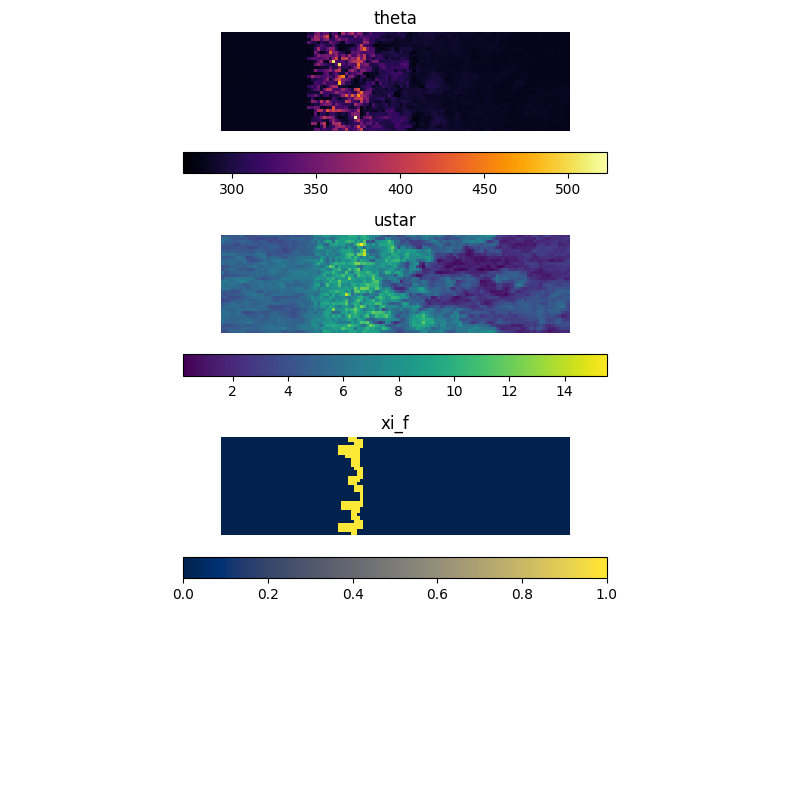

In [11]:
frame = 131
fig, axs = plt.subplots(4, 1, figsize=(8, 8))
im0 = axs[0].imshow(theta[frame].T, cmap='inferno')
axs[0].set_title('theta')
cbar = fig.colorbar(im0, ax=axs[0], orientation='horizontal')

im1 = axs[1].imshow(ustar[frame].T, cmap='viridis')
axs[1].set_title('ustar')
cbar = fig.colorbar(im1, ax = axs[1], orientation='horizontal')

im2 = axs[2].imshow(xi_f[frame].T, vmin=0, vmax=1, cmap='cividis')
axs[2].set_title('xi_f')
cbar = fig.colorbar(im2, ax=axs[2], orientation='horizontal')

for ax in axs:
    ax.axis('off')
fig.tight_layout()

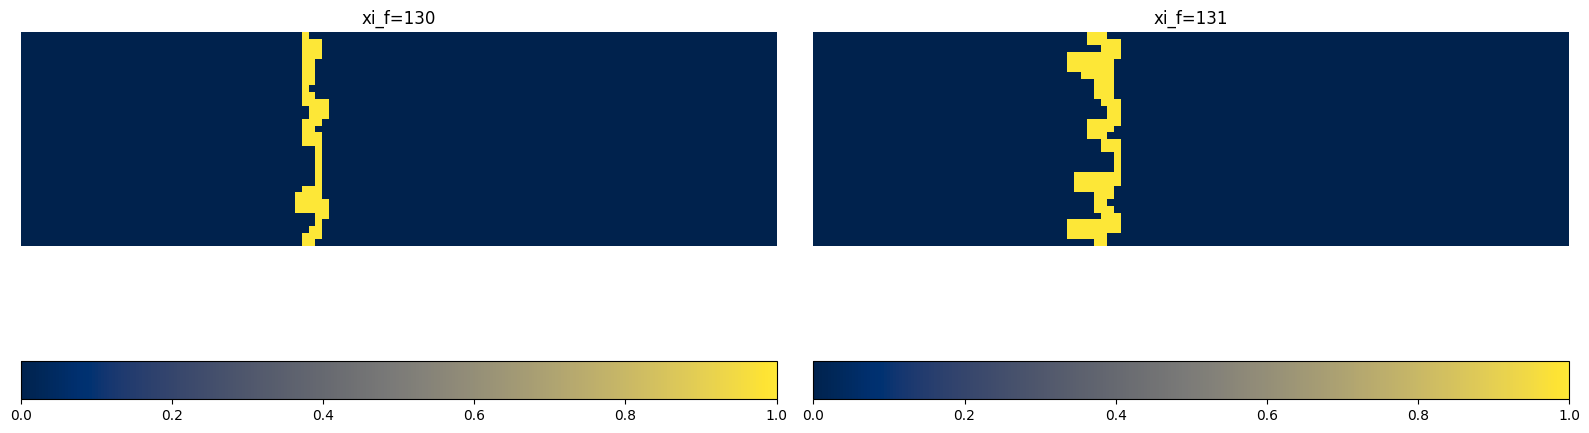

In [12]:
frame = 130
shift=1
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
im1 = axs[0].imshow(xi_f[frame].T, vmin=0, vmax=1, cmap='cividis')
axs[0].set_title('xi_f={}'.format(frame))
cbar = fig.colorbar(im1, ax=axs[0], orientation='horizontal')

im2 = axs[1].imshow(xi_f[frame+shift].T, vmin=0, vmax=1, cmap='cividis')
axs[1].set_title('xi_f={}'.format(frame+shift))
cbar = fig.colorbar(im2, ax=axs[1], orientation='horizontal')

for ax in axs:
    ax.axis('off')
fig.tight_layout()


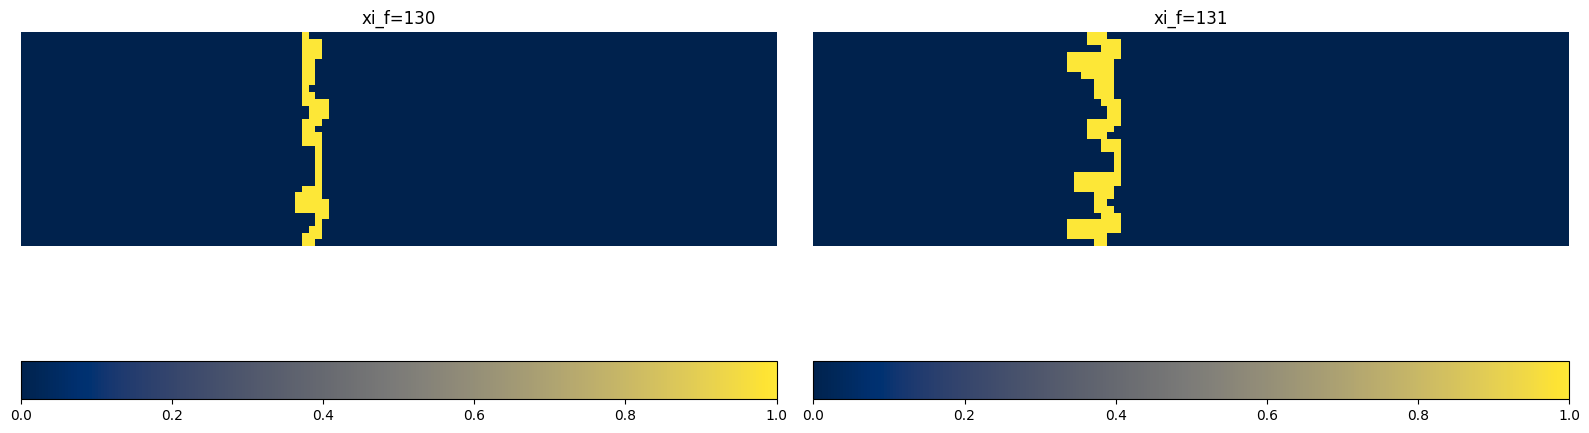

In [13]:
frame = 130
shift=1
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
im1 = axs[0].imshow(xi_f[frame].T, vmin=0, vmax=1, cmap='cividis')
axs[0].set_title('xi_f={}'.format(frame))
cbar = fig.colorbar(im1, ax=axs[0], orientation='horizontal')

im2 = axs[1].imshow(xi_f[frame+shift].T, vmin=0, vmax=1, cmap='cividis')
axs[1].set_title('xi_f={}'.format(frame+shift))
cbar = fig.colorbar(im2, ax=axs[1], orientation='horizontal')

for ax in axs:
    ax.axis('off')
fig.tight_layout()


In [14]:
xi_n=np.zeros_like(xi_f)

In [15]:
rf=1

xi_n=np.roll(xi_f,rf,axis=0) #*(1+np.roll(ustar,rf,axis=0)+np.roll(theta,rf,axis=0))

In [16]:
#xi_n1= np.roll(xi_n,1,axis=1) * (1+np.roll(ustar,rf,axis=0) + 0.5* np.roll(theta,rf,axis=0) + np.roll(ustar,rf,axis=0)* np.roll(theta,rf,axis=0)) 
xi_n1= np.roll(xi_n,1,axis=1) * (1+ np.roll(ustar,rf,axis=0)) 

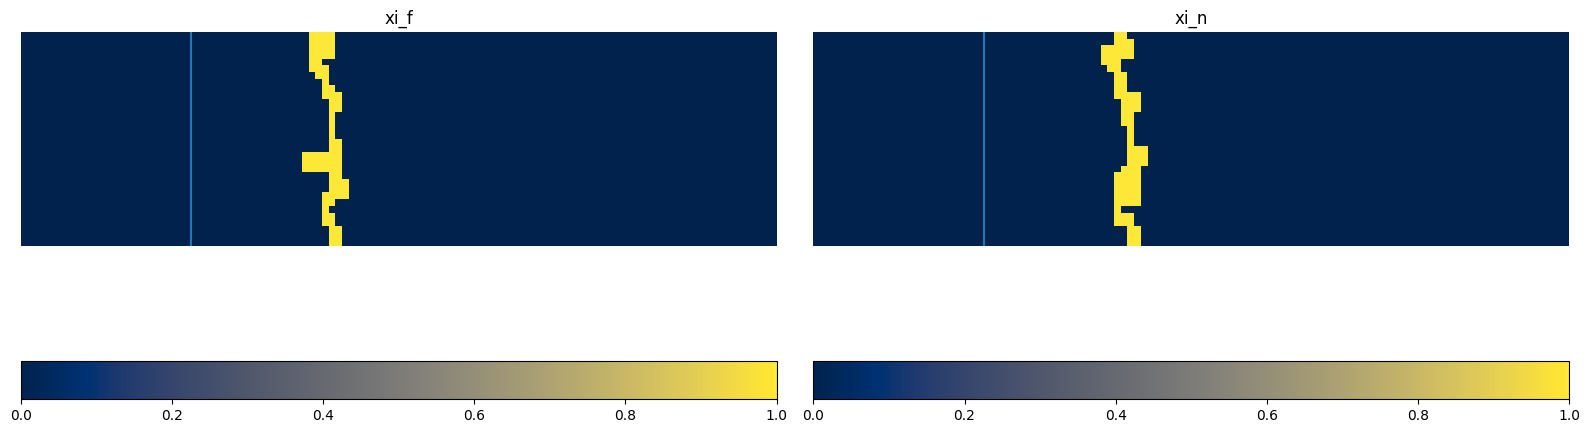

In [17]:
frame = 140
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
im1 = axs[0].imshow(xi_f[frame].T, vmin=0, vmax=1, cmap='cividis')
axs[0].set_title('xi_f')
axs[0].axvline(25)
cbar = fig.colorbar(im1, ax=axs[0], orientation='horizontal')

im2 = axs[1].imshow(xi_n1[frame].T, vmin=0, vmax=1, cmap='cividis')
axs[1].set_title('xi_n')
axs[1].axvline(25)
cbar = fig.colorbar(im2, ax=axs[1], orientation='horizontal')

for ax in axs:
    ax.axis('off')
fig.tight_layout()

In [18]:
# Create trainers 

In [19]:
# Create a U-Resnet model for predicting next 5 steps from last 5 steps:
